<h1 style="font-weight:bold;text-align:center"> Bank Telemarketing Marketing Campaign </h1>

***

<p style="text-align:center;font-weight:600">&emsp;Sean Kristian Anderson&emsp;||&emsp;Davis Sebastian&emsp;</p>
<p style="text-align:center;">DTIDS-0206 Final Project by Alpha Team</p>

***

<p style="font-weight:500">Table Of Contents</p>

1. [Business Problem Understanding](#1-business-problem-understanding)       
    1.1. [Background](#11-background)      
    1.2. [Problem Statement](#12-problem-statement)        
    1.3. [Objectives](#13-objectives)      
    1.4. [Metric Evaluation](#14-metric-evaluation)        
            &emsp;1.4.1. [Cost Analysis](#141-cost-analysis)   
2. [Data Understanding](#2-data-understanding)       
    2.1. [Attribute Information](#21-attribute-information)      
    2.2. [Import Libraries](#22-import-libraries)      
    2.3. [Descriptive Statistics](#23-descriptive-statistics)     
3. [Data Preprocessing](#3-data-preprocessing)       
    3.1. [Duplicated Values](#31-duplicated-values)      
    3.2. [Missing Values](#32-missing-values)     
    3.3. [Outliers](#33-outliers)       
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)      
    4.1. [Data Distribution](#41-data-distribution)
5. [Feature Engineering](#5-feature-engineering)      
    5.1. [Data Imputation](#51-data-imputation)        
    5.2. [Feature Selection](#52-feature-selection)        
    5.3. [Feature Encoding](#53-feature-encoding)      
        &emsp;5.3.1. [Pdays Column Bin](#531-pdays-column-bin)   
        &emsp;5.3.2. [Categorical Columns](#532-categorical-columns)      
    5.4. [Feature Scaling](#54-feature-scaling)      
    5.5. [Data Split](#55-data-split)        
    5.6. [Pipeline](#56-pipeline)            
6. [Methodology (Modeling & Analysis)](#6-methodology)        
    6.1. [Modeling](#61-modeling)       
        &emsp;6.1.1. [Model Benchmark against Raw Data](#611-model-benchmark-against-raw-data)   
        &emsp;6.1.2. [Model Benchmark against Oversampled Data](#612-model-benchmark-against-oversampled-data)   
        &emsp;6.1.3. [Model Benchmark against Removed Multicollinearity Data](#613-model-benchmark-against-removed-multicollinearity-data)   
        &emsp;6.1.4. [Model Benchmark to Test Data](#614-model-benchmark-to-test-data)   
        &emsp;6.1.5. [Model Hyperparameter Tuning](#615-model-hyperparameter-tuning)   
        &emsp;6.1.6. [Underfitting Overfitting](#616-underfitting-overfitting)   
        &emsp;6.1.7. [Pipeline](#617-pipeline)   
    6.2. [Analysis](#62-analysis)       
        &emsp;6.2.1. [Model Benchmark Analysis](#621-model-benchmark-analysis)      
        &emsp;6.2.2. [Business ML Analysis](#622-business-ml-analysis)          
7. [Conclusion and Recommendation](#7-conclusion-and-recommendation)        
    7.1. [Conclusion](#71-conclusion)     
    7.2. [Recommendation](#72-recommendation)     



Tableau:

Slide Presentation: <a href src="https://www.canva.com/design/DAGeScCufiI/OtTsdTuXp_rSrNaKOxwcsQ/edit?utm_content=DAGeScCufiI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">Click Here</a>

## **1. Business Problem Understanding**

### **1.1. Background**

A Portuguese banking institution conducted a telemarketing campaigns. With the goal of spreading awareness and convincing customers to open a term deposit account. Given the data from 2008 to 2010, seen from the graph below that Portugal GDP growth was decreasing from 2007 before it sinks in 2009. As it was the worst Portugal GDP growth for more than 15 years.

GDP refers to the dollar value of all final goods and services produced within a country’s borders in a given year [[Corporate Finance Institute, 2023](https://corporatefinanceinstitute.com/resources/economics/negative-growth/)]. Positive GDP growth indicates that the economy is doing well by the increasing productivity in a country. Meanwhile, negative GDP growth are marked by decreasing personal income, higher unemployment, and decline in wholesale or retail sales [[Investopedia, 2020](https://www.investopedia.com/terms/n/negative-growth.asp)].

<iframe src="https://data.worldbank.org/share/widget?contextual=default&end=2020&indicators=NY.GDP.MKTP.KD.ZG&locations=PT&start=1990" width='450' height='300' frameBorder='0' scrolling="no" ></iframe>

Term deposit is a deposit in financial institution with a specific maturity date or period to maturity. Some of the benefits of this kind of deposit includes: [[Tata AIA Blogs, 2024](https://www.tataaia.com/blogs/financial-planning/what-is-a-term-deposit-and-its-benefits.html#:~:text=Term%20Deposit%20Benefits,-Guaranteed%20returns1&text=The%20returns%20are%20fixed%20at,will%20receive%20and%20by%20when.)]

- Minimum risk: term deposit interest rates are fixed and unaffected by the market sentiment or financial institution’s policies,
- Flexible: term deposit allow small investment amount and the period can be adjusted accordingly.

While maintaining good benefit for customers, term deposit also help banks by make money between the interest rate they pay on deposits and the interest rate they receive by funding loans.

As Portugal was encountering economical struggle in 2008 - 2009, banking institution certainly having difficulties finding term deposit customers. Which lead in conducting direct telemarketing campaigns, by making a phone call to customers. As this method might works to convince the customers, it’s not effective and exhausting. There are more than 41 thousand records and customer could be contacted for more than once, which is time-consuming. In addition, the outcome could be disappointing and ends in wasted resources.

### **1.2. Problem Statement**

Direct marketing, is a marketing strategy that reaching out potential customers directly via phone calls, emails, etc. Although this strategy requires low cost, it has many drawbacks includes irritates customer, time consuming, limited reaches [[Educba, 2025](https://www.educba.com/advantages-and-disadvantages-of-direct-marketing/)]. Despite all the effort marketing team had put to support this method, the output is terrible with only 10% of total customer are actually opened a term deposit. Moreover, there is a problem regarding no initial screening before performing the call, shown by considerable value gap between each value in categorical variables.


### **1.3. Objectives**

Despite the drawbacks from direct telemarketing strategy, the effectiveness of this method can be increased using machine learning. The model have a goal to increase the institution benefit by predicting the likelihood of customers open a term deposit account while reducing its expenses by avoiding unnecessary calls. In addition, this model will also introduce a stronger bank customer relationship by minimizing the disturbance for them. Later on, this model should be the guidelines for the marketing team before performing the calls in order to yield efficient campaigns.

### **1.4. Metric Evaluation**

Target variables in this analysis as following:     
0 : Not opening a term deposit      
1 : Opening a term deposit      

<table>
    <body>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2">Actual</th>
        </tr>
        <tr>
            <th>0</th>
            <th>1</th>
        </tr>
        <tr>
            <th rowspan="2">Predicted</th>
            <th>0</th>
            <td><strong><center>TN (True Negative)</center></strong><br />
                The model predicts correctly for customer will not open a deposit account</td>
            <td><strong><center>FN (False Negative)</center></strong>
                <center>Type II Error</center><br />
                The model predicts that customer will not open a deposit account while in reality, they will</td>
        </tr>
        <tr>
            <th>1</th>
            <td><strong><center>FP (False Positive)</center></strong>
                <center>Type I Error</center><br />
                The model predicts that customer will open a deposit account while in reality, they will not</td>
            <td><strong><center>TP (True Positive)</center></strong><br /><br />
                The model predicts correctly for customer will open a deposit account</td>
        </tr>
    </body>
</table>

**Type I Error (FP)** consequences:       
- Introduce a disturbance for customer, might lead to loosen bank - customer relationship,      
- Wasted resources by making unnecessary calls.

**Type II Error (FN)** consequences:     
- Loss in potential customers,       
- Decreasing company revenue.

#### **1.4.1. Cost Analysis**

<p style="font-weight:500">Related to Telemarketing</p>

Average mobile calls cost&emsp;&emsp;&emsp;&ensp;: €0.076 per minute [[Anacom, 2013](https://www.anacom.pt/render.jsp?contentId=1171059)]       
Effective call duration&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: 4'50" [[Klenty, 2023](https://www.klenty.com/blog/how-many-cold-calls-to-make-per-day/)]     
Number of calls to reach a sale&emsp;: 48 calls per customer [[Rep.ai, 2025](https://rep.ai/blog/cold-calling-statistics)]      
Average closing rate&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: 20% [[HubSpot, 2017](https://blog.hubspot.com/sales/new-sales-close-rate-industry-benchmarks-how-does-your-close-rate-compare#:~:text=However%2C%20the%20average%20close%20rate,become%20less%20aligned%20since%202021.)]

<p style="font-weight:500">Related to Bank Deposit</p>

Minimum amount to open a term deposit&emsp;: €200 [[e-residence, 2023](https://e-residence.com/open-bank-account/#:~:text=What%20is%20the%20minimum%20amount,€200%20and%20€300.)]        
Average bank profit from deposit&emsp;&emsp;&emsp;&emsp;&ensp;: 3% [[FDIC, 2024](https://www.fdic.gov/news/speeches/2024/quarterly-banking-profile-first-quarter-2024#:~:text=As%20seen%20in%20this%20chart,pandemic%20rate%20of%200.66%20percent.&text=The%20next%20chart%20shows%20that%20the%20noncurrent%20loan%20balances%20grew,community%20banks%20was%20209.6%20percent.&text=Next%20chart%20shows%20that%20domestic,increase%20since%20fourth%20quarter%202021.)]


From statistics above, formula to calculate wasted telemarketing cost can be constructed as below for one thousand customers:

<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}WastedTelemarketingCostFor1kCustomer=80%*\left(\left(CostCall*CallDuration*NumOfCalls\right)*1000\right)" title="WastedTelemarketingCostFor1kCustomer=80%*\left(\left(CostCall*CallDuration*NumOfCalls\right)*1000\right)" />
<br />
<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}WastedTelemarketingCostFor1kCustomer=80%*\left(\left(0.076*\left(290/60\right)*48\right)*1000\right)" title="WastedTelemarketingCostFor1kCustomer=80%*\left(\left(0.076*\left(290/60\right)*48\right)*1000\right)" />
<br />
<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}WastedTelemarketingCostFor1kCustomer=\euro&space;14,106" title="WastedTelemarketingCostFor1kCustomer=\euro 14,106" />

The closing rate for telemarketing is only about 20%, so for the assumption for one thousand customers, only 200 person actually opened a term deposit account with amount of €250 per person. The bank profit formula is constructed below:

<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}BankProfitFor1kCustomers=PersonOpenedDeposit*\left(DepositAmount*BankProfit\right)" title="BankProfitFor1kCustomers=PersonOpenedDeposit*\left(DepositAmount*BankProfit\right)" />
<br />
<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}BankProfitFor1kCustomers=200*\left(250*3%\right)" title="BankProfitFor1kCustomers=200*\left(250*3%\right)" />      
<br />
<img src="https://latex.codecogs.com/png.image?\inline&space;\large&space;\dpi{120}\bg{white}BankProfitFor1kCustomers=\euro&space;1,500" title="BankProfitFor1kCustomers=\euro 1,500" />

From the calculation above it seen that for every one thousand customers, the bank has lost €14,106 while obtaining €1,500 revenue. While both errors should be minimized accordingly, Type I error result a big loss for the bank while produce revenue only around 10% of the total loss. In addition, Type I error will also lead to another problems as customer annoyance resulting in loosen bank-customer relationship because of annoyance introducted to customer. In result, Type I error is more harmful for the company for short and long term, therefore this error should be the main focus to be minimized.

## **2. Data Understanding**

### **2.1. Attribute Information**

<p style="font-weight:500">Attribute Related to Bank Client Data</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| age | Integer | Age of users |
| job | Text (Categorical) | Type of Job | "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | Text (Categorical) | Marital status of users | "divorced","married","single","unknown" |
| education | Text (Categorical) | Education of users | "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | Text (Categorical) | Has Credit in default? | "no","yes","unknown" |
| housing | Text (Categorical) | Has Housing Loan? | "no","yes","unknown" |
| loan | Text (Categorical) | Has Personal Loan? | "no","yes","unknown" |

<p style="font-weight:500">Attribute Related to Last Contact</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| contact | Text (Categorical) | Last contact communication type | "cellular","telephone" |
| month | Text (Categorical) | Last contact month of year | "jan", "feb", "mar", "apr", "may", "june", "july", "aug", "sept", "oct", "nov", "dec" |
| day_of_week | Text (Categorical) | Last contact day of week | "mon","tue","wed","thu","fri" | 
| duration | Integer | Last contact duration |

Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<p style="font-weight:500">Attribute Related to Bank Campaign</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| campaign | Integer | Number of contacts performed during this campaign and for this client |
| pdays | Integer | Number of days passed after the client was last contacted from previous campaign |
| previous | Integer | Number of contacts performed before this campaign and for this client |
| poutcome | Text (Categorical) | Outcome of the previous marketing campaign | "failure","nonexistent","success" |

<p style="font-weight:500">Attribute Related to Social and Economic Contexts</p>

| Attribute | Data Type | Description |
| --- | --- | --- |
| emp.var.rate | Float | Employment variation rate |
| cons.price.idx | Float | Consumer price index |
| cons.conf.idx | Float | Consumer confidence index |
| euribor3m | Float | Euribor 3 month rate - daily indicator |
| nr.employed | Float | Number of employees - quarterly indicator |

<p style="font-weight:500">Other Attribute</p>

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- | 
| y | Text (Categorical) | Subscribed a term deposit (output) | "yes", "no" |

### **2.2 Import Libraries**

In [227]:
# Library
import pandas as pd
import numpy as np
import pickle
from scipy.stats import anderson

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, KBinsDiscretizer, FunctionTransformer, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Selection
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier

# GCP
import os
from google.cloud import bigquery, storage, aiplatform

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', 1000, "max_colwidth", 1000, 'display.width', 1000, 'display.max_rows',1000)

### **2.3. Descriptive Statistics**

In [3]:
raw_data = pd.read_csv("../Dataset/bank-additional-full.csv", sep=";")

data = raw_data.copy()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.shape

(41188, 21)

## **3. Data Preprocessing**

### **3.1. Duplicated Values**

In [6]:
data_shape = data.shape

pd.DataFrame({
    "": ["# of Records", "# of Duplicated Records", "% of Duplicated Records"],
    "Value": pd.Series([data_shape[0], data.duplicated().sum(), data.duplicated().sum() / data_shape[0] * 100], dtype="object")
})

,,Value
0,# of Records,41188
1,# of Duplicated Records,12
2,% of Duplicated Records,0.029135


In [7]:
data = data.drop_duplicates()

### **3.2. Missing Values**

Based on the domain knowledge, missing values in the dataset for categorical columns are marked with **"unknown"** label

In [8]:
categorical_columns = data.select_dtypes(include='object')

unknown_records_df = pd.DataFrame({
    'Columns': categorical_columns.columns,
    '# of Unknown Record': [(categorical_columns[col] == 'unknown').sum() for col in categorical_columns.columns],
    "% of Unknown Record": [
        ((categorical_columns[col] == 'unknown').sum() / categorical_columns[col].count()) * 100 for col in categorical_columns.columns]
})

unknown_records_df[unknown_records_df['# of Unknown Record'] > 0]

,Columns,# of Unknown Record,% of Unknown Record
0,job,330,0.801438
1,marital,80,0.194288
2,education,1730,4.201477
3,default,8596,20.876239
4,housing,990,2.404313
5,loan,990,2.404313


In [9]:
data['default'] = data.apply(lambda X: 'yes' if (X['housing'] == "no" and X['loan'] == "no") else X['default'], axis=1)

From domain knowledge, `default` column represents the failure of customers to make repayments. Therefore the missing value type for this column is Missing At Random (MAR) since it can be explained by `housing` and `loan` columns. WHen a customer doesn't have `housing` nor `loan`, it unlikely for them to have `default`. 

In [10]:
categorical_columns = data.select_dtypes(include='object')

unknown_records_df = pd.DataFrame({
    'Columns': categorical_columns.columns,
    '# of Unknown Record': [(categorical_columns[col] == 'unknown').sum() for col in categorical_columns.columns],
    "% of Unknown Record": [
        ((categorical_columns[col] == 'unknown').sum() / categorical_columns[col].count()) * 100 for col in categorical_columns.columns]
})

unknown_records_df[unknown_records_df['# of Unknown Record'] > 0]

,Columns,# of Unknown Record,% of Unknown Record
0,job,330,0.801438
1,marital,80,0.194288
2,education,1730,4.201477
3,default,5140,12.483000
4,housing,990,2.404313
5,loan,990,2.404313


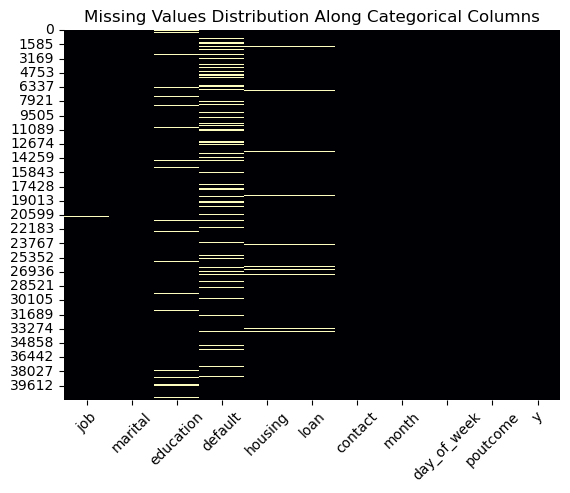

In [11]:
categorical_columns_modified = categorical_columns.applymap(lambda x: None if x == "unknown" else x)

plt.title('Missing Values Distribution Along Categorical Columns')
sns.heatmap(categorical_columns_modified.isna(), cmap='magma', cbar=False)
plt.xticks(rotation=45)
plt.show()

Figure above shows the missing value distribution after imputing the `default` column with "no" when the `housing` and `loan` are "no". It seems there is a pattern within `housing` and `loan` data, whenever the `housing` column is empty, the `loan` column is also empty. Marking that the missing columns type is Missing Completely at Random (MCAR). For the records with low missing value percentage, it will be dropped which include these column: job, marital, education, housing, and loan. As for the default column, the missing value percentage still pretty high (12,4%) which will be handled in [feature engineering](#51-data-imputation) section.

In [12]:
data = data[(data['job'] != "unknown") & (data['marital'] != "unknown") & (data['education'] != "unknown") &
            (data['housing'] != "unknown") & (data['loan'] != "unknown")]

In [13]:
numerical_columns = data.select_dtypes(include='number')

numerical_columns.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

As for the numerical columns, there are no missing values.

### **3.3. Outliers**

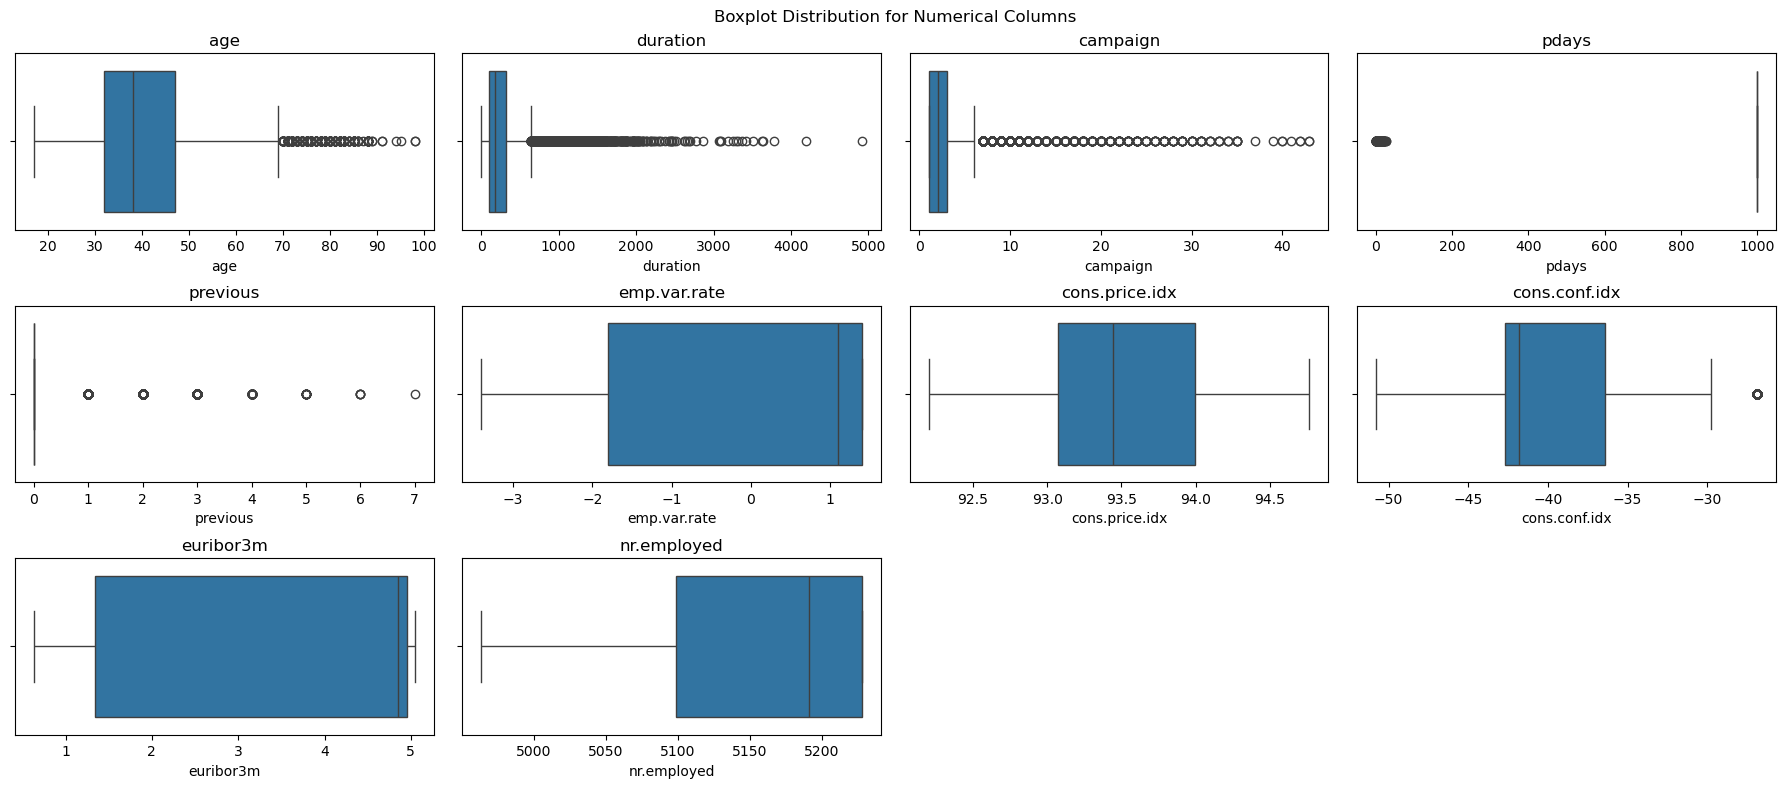

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(18, 8))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Boxplot Distribution for Numerical Columns")
plt.show()

In [15]:
def get_lower_upper_bound(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return {'lower_bound': lower_bound, 'upper_bound': upper_bound}


def count_outliers(data):
    results = []
    
    for col in data:
        lower_upper_bound = get_lower_upper_bound(data[col])
        
        outliers_count = ((data[col] < lower_upper_bound['lower_bound']) |
                        (data[col] > lower_upper_bound['upper_bound'])).sum()
        
        results.append({
            "Column": col,
            "Lower Bound": lower_upper_bound['lower_bound'],
            "Upper Bound": lower_upper_bound['upper_bound'],
            "# of Outliers": outliers_count,
            "% of Outliers": outliers_count / data[col].shape[0] * 100
        })
    
    return pd.DataFrame(results)

outliers_df = count_outliers(numerical_columns)
outliers_df[outliers_df['# of Outliers'] > 0]

,Column,Lower Bound,Upper Bound,# of Outliers,% of Outliers
0,age,9.50,69.50,411,1.074959
1,duration,-223.50,644.50,2749,7.189936
2,campaign,-2.00,6.00,2220,5.806350
3,pdays,999.00,999.00,1366,3.572736
4,previous,0.00,0.00,5179,13.545535
7,cons.conf.idx,-52.15,-26.95,408,1.067113


Although dropping values to handle outliers should be done carefully, this method was chosen to remove the **extreme** outliers in certain columns with least influence on the dependent variable, based on domain knowledge. The number of dropped records also need to be analyzed. These columns include:
- campaign: Customer usually decide whether to open a deposit account during first offer from the bank. While there is possibility of changing their decision after second / third call, the likelihood is very low.

In [16]:
original_data_shape = data.shape

data = data[(data['campaign'] < 20)]

new_data_shape = data.shape

pd.DataFrame({
    "": ["Original Data Shape", "# of Dropped Records", "% of Dropped Records"],
    "Value": pd.Series([original_data_shape[0], (original_data_shape[0]) - (new_data_shape[0]), ((original_data_shape[0]) - (new_data_shape[0])) / (original_data_shape[0]) * 100], dtype=object)
})

,,Value
0,Original Data Shape,38234
1,# of Dropped Records,178
2,% of Dropped Records,0.465554


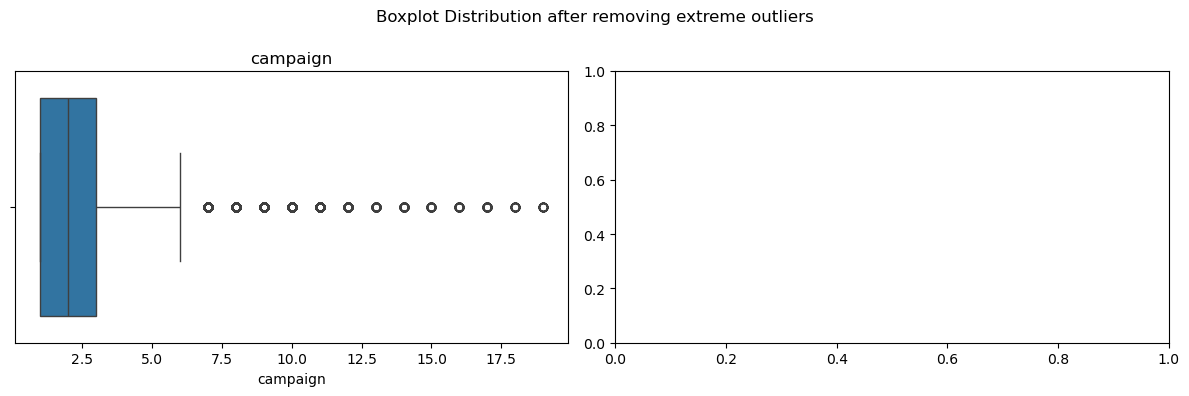

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes = axes.flatten()
for i, col in enumerate(['campaign']):    
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
fig.subplots_adjust(top=0.825)
plt.suptitle("Boxplot Distribution after removing extreme outliers")
plt.show()

As shown in the figures above, 1702 records which made up around 4,1% of total records have been dropped. This number still acceptable since its under 5%. Seen that pdays column has no outliers remaining, meanwhile for the remaining outliers in the campaign column will be handled later on in the [feature engineering](#feature-engineering) section

## **4. Exploratory Data Analysis (EDA)**

### **4.1. Data Distribution**

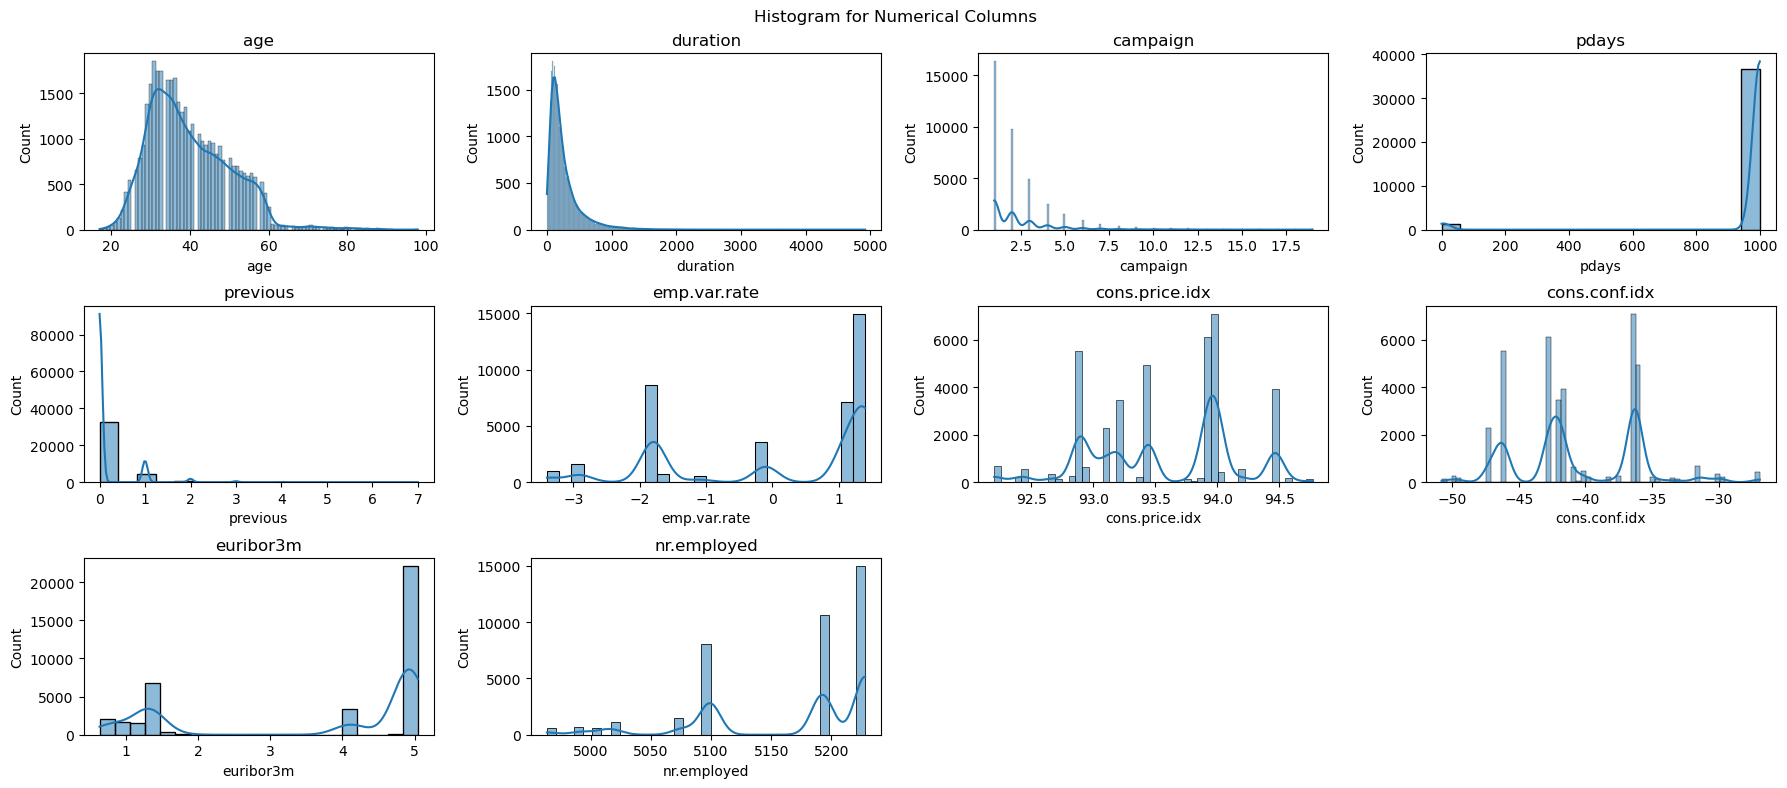

In [18]:
numerical_columns = data.select_dtypes(include='number')

fig, axes = plt.subplots(3, 4, figsize=(18, 8))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.histplot(x=data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Histogram for Numerical Columns")
plt.show()

In [19]:
result = {"stats_values": [], "best_crit_values": [], "best_sgnfc_level": [], "distribution": []}

for col in numerical_columns:
    anderson_test = anderson(data[col])
    
    # Use for looking the best critical values and significance level
    best_i = 0
    dist_stat = ""
    for i, crit_value in enumerate(anderson_test.critical_values):
        if anderson_test.statistic < crit_value:
            best_i = i
            dist_stat = f"Data is normally distributed at {anderson_test.significance_level[best_i]} significance level"
            break
        elif i+1 == len(anderson_test.critical_values):
            best_i = i
            dist_stat = "Data does not normally distributed at any significance level"
    
    result["stats_values"].append(anderson_test.statistic)
    result["best_crit_values"].append(anderson_test.critical_values[best_i])
    result["best_sgnfc_level"].append((anderson_test.significance_level[best_i]) / 100)
    result["distribution"].append(dist_stat)
    
pd.DataFrame({
    "Column": numerical_columns.columns,
    "Statistic Value": result['stats_values'],
    "Best Critical Values": result['best_crit_values'],
    "Best Alpha": result['best_sgnfc_level'],
    "Distribution": result['distribution'],
})

,Column,Statistic Value,Best Critical Values,Best Alpha,Distribution
0,age,437.085457,1.092,0.01,Data does not normally distributed at any significance level
1,duration,2572.025507,1.092,0.01,Data does not normally distributed at any significance level
2,campaign,3739.663391,1.092,0.01,Data does not normally distributed at any significance level
3,pdays,14053.172531,1.092,0.01,Data does not normally distributed at any significance level
4,previous,10281.755974,1.092,0.01,Data does not normally distributed at any significance level
5,emp.var.rate,4042.122937,1.092,0.01,Data does not normally distributed at any significance level
6,cons.price.idx,1093.887383,1.092,0.01,Data does not normally distributed at any significance level
7,cons.conf.idx,1340.076439,1.092,0.01,Data does not normally distributed at any significance level
8,euribor3m,5689.938161,1.092,0.01,Data does not normally distributed at any significance level
9,nr.employed,3293.627274,1.092,0.01,Data does not normally distributed at any significance level


Histogram and table provided above represents the distribution of each columns with numerical value, from the provided figures above gives insight whether the column are normally distributed and the skewness. Anderson-Darling (AD) test was used to determine the normality distribution because of the enormous amount of the records, making Shapiro-Wilk (SW) test inadequate. In summary, there is no numerical column that normally distributed. Furthermore, pdays column is extremely skewed as seen in the histogram, which will be handled in [feature engineering](#pdays-column-bin) section.

### **4.2. a**

## **5. Feature Engineering**

### **5.1. Data Imputation**

In [20]:
data = data.applymap(lambda x: np.nan if x == "unknown" else x)

null_data_df = data.isna().sum()

null_data_df[null_data_df > 0]

default    4550
dtype: int64

In [21]:
data['default'].value_counts(dropna=False)

default
no     18359
yes    15147
NaN     4550
Name: count, dtype: int64

In [22]:
imputer_transformer = ColumnTransformer(
    [
        ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan), ['default'])
    ], remainder='passthrough'
).set_output(transform="pandas")

Explained before in the [Data Preprocessing](#missing-values) section that missing values in default column are more than 20%. Simple iterative computing will be done for this column since it holds categorical data. Most frequent strategy was chosen because the extreme imbalance value for each category.

### **5.2. Feature Selection**

In [23]:
selection_transformer = ColumnTransformer(
    [
        ('selection', 'drop', ['duration'])
    ], remainder='passthrough'
).set_output(transform='pandas')

Based on domain knowledge, duration represents the previous call duration. So, this column will stays unknown if the call has not been performed. Therefore, this column should be dropped and not included for the analysis.

### **5.3. Feature Encoding**

In [24]:
encoding_transformer_list = []

#### **5.3.1. pdays Column Bin**

In [25]:
data['pdays'].value_counts()

pdays
999    36690
3        393
6        379
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: count, dtype: int64

In [26]:
def bin_pdays(x):
    return np.where(x < 30, 0, 1)

encoding_transformer_list.append(('pdays_bin', FunctionTransformer(bin_pdays), ['pdays']))

Mentioned before that pdays column is extremely skewed in [EDA](#data-distribution) section. From value counts result above, it seen there are extreme gap between 999 value and the others. So it will be wise to bin this numerical column into categorical column that represent whether the last contact with this customer was within 30 days ago.

#### **5.3.2. Categorical Columns**

In [27]:
categorical_columns = data.select_dtypes(include='object')

pd.DataFrame({
    "Columns": categorical_columns.columns,
    "# of Unique Values": [categorical_columns[col].nunique() for col in categorical_columns.columns],
    "Unique Values": [categorical_columns[col].unique() for col in categorical_columns.columns],
})

,Columns,# of Unique Values,Unique Values
0,job,11,"[housemaid, services, admin., technician, blue-collar, retired, management, unemployed, self-employed, entrepreneur, student]"
1,marital,3,"[married, single, divorced]"
2,education,7,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, university.degree, illiterate]"
3,default,2,"[yes, no, nan]"
4,housing,2,"[no, yes]"
5,loan,2,"[no, yes]"
6,contact,2,"[telephone, cellular]"
7,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,5,"[mon, tue, wed, thu, fri]"
9,poutcome,3,"[nonexistent, failure, success]"


In [28]:
encoding_transformer_list.append(('ordinal_encoding', OrdinalEncoder(), ['education', 'month', 'day_of_week']))
encoding_transformer_list.append(('one_hot_encoding', OneHotEncoder(drop='first', sparse_output=False), ['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']))
encoding_transformer_list.append(('binary_encoding', BinaryEncoder(), ['job']))

There are 9 columns that hold categorical data, excluding the y column since it is the target variable. Additionally, each categorical column will have a different encoding method, as each column represents different values. The methods used for each column are:
- Ordinal Encoding: (education, month, day_of_week) because they hold value that can be ordered
- One Hot Encoding: (martial, default, housing, loan, contact, poutcome) because number of unique value are low
- Binary Encoding: (job) because number of unique value is big      

Notes that the nan value in default column is being abandoned because imputation will be applied on this column which included in [data imputation](#data-imputation) section

In [29]:
encoding_transformer = ColumnTransformer(
    encoding_transformer_list,
    remainder='passthrough'
).set_output(transform="pandas")

### **5.4. Feature Scaling**

In [30]:
count_outliers(numerical_columns)

,Column,Lower Bound,Upper Bound,# of Outliers,% of Outliers
0,age,9.5000,69.5000,411,1.079987
1,duration,-222.5000,645.5000,2739,7.197288
2,campaign,-2.0000,6.0000,2042,5.365777
3,pdays,999.0000,999.0000,1366,3.589447
4,previous,0.0000,0.0000,5179,13.608892
5,emp.var.rate,-6.6000,6.2000,0,0.000000
6,cons.price.idx,91.6965,95.3725,0,0.000000
7,cons.conf.idx,-52.1500,-26.9500,408,1.072104
8,euribor3m,-4.0815,10.3865,0,0.000000
9,nr.employed,4905.6000,5421.6000,0,0.000000


In [31]:
scaling_transformer = ColumnTransformer(
    [
        ('robust_scaling', RobustScaler(), ['age', 'campaign', 'previous', 'cons.conf.idx']),
        ('max_abs_scaler', MaxAbsScaler(), ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'])
    ], remainder='passthrough'
).set_output(transform="pandas")

Majority of the numerical columns contain outliers, thus Robust Scaler was applied since its characteristic that resistant to outliers. But there are some columns have outliers, such as emp.var.rate, cons.price.idx, euribor3m, and nr.employed even though they are not normally distribution as included in the [EDA](#41-data-distribution) section. Hence Max Abs Scaler was chosen instead of Min-Max Scaler because Robust Scaler output are not limited between range [0-1]. Note on these feature scaling process:      
- pdays should be ignored since its binned into categorical column in [Feature Encoding](#531-pdays-column-bin) section,
- duration should be ignored since its dropped in [Feature Selection](#52-feature-selection) section.

### **5.5. Data Split**

In [135]:
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == "yes" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### **5.6. Pipeline**

In [136]:
def rename_columns_remainder(X):
    if isinstance(X, pd.DataFrame):
        X.columns = [str(col).split("__")[-1] for col in X.columns]
    return X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)

rename_transformer_remainder = FunctionTransformer(rename_columns_remainder)

def convert_column_selection(X):
    return pd.DataFrame(X)

convert_transformer_selection = FunctionTransformer(convert_column_selection, feature_names_out='one-to-one')

def rename_columns_encoding(X):
    columns_name = []
    
    for i in range(5):
        if i == 0:
            columns_name += ["Last_Contact_Within_30_Days"]
            continue
        
        columns_name += list(encoding_transformer.transformers_[i][1].get_feature_names_out())
    
    X.columns = columns_name
    return X

rename_transformer_encoding = FunctionTransformer(rename_columns_encoding)

In [137]:
feature_engineering_pipelines = Pipeline([
    ("Data Imputer", imputer_transformer),
    ("Rename After Imputer", rename_transformer_remainder),
    ("Feature Selection", selection_transformer),
    ("Convert After Selection", convert_transformer_selection),
    ("Rename After Selection", rename_transformer_remainder),
    ("Feature Encoding", encoding_transformer),
    ("Rename After Encoding", rename_transformer_encoding),
    ("Feature Scaling", scaling_transformer),
    ("Rename After Scaling", rename_transformer_remainder),
])

feature_engineering_pipelines

Pipeline(steps=[('Data Imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['default'])])),
                ('Rename After Imputer',
                 FunctionTransformer(func=<function rename_columns_remainder at 0x338fb04a0>)),
                ('Feature Selection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('selection', 'drop',
                                                  ['d...
                 FunctionTransformer(func=<function rename_columns_encoding at 0x338fb2160>)),
                ('Feature Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaling',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous',
                                                   'cons.conf.idx']),
                                                 ('max_abs_scaler',
                                                  MaxAbsScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed'])])),
                ('Rename After Scaling',
                 FunctionTransformer(func=<function rename_columns_remainder at 0x338fb04a0>))])

In [138]:
X_train_prep = feature_engineering_pipelines.fit_transform(X_train)

X_train_prep.head()

,age,campaign,previous,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed,Last_Contact_Within_30_Days,education,month,day_of_week,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,job_0,job_1,job_2,job_3
32924,-0.400000,0.0,0.0,-0.698413,-0.529412,0.980225,0.257483,0.975326,1.0,6.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6348,-0.933333,1.0,0.0,0.857143,0.323529,0.991843,0.962735,0.992904,1.0,2.0,6.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34451,-0.600000,-0.5,1.0,-0.698413,-0.529412,0.980225,0.250942,0.975326,1.0,3.0,6.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17101,0.466667,-0.5,0.0,-0.142857,0.411765,0.991041,0.983548,1.000000,1.0,6.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
36937,1.733333,-0.5,0.0,0.158730,-0.852941,0.980964,0.217839,0.970945,1.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [139]:
X_test_prep = feature_engineering_pipelines.transform(X_test)

X_test_prep.head()

,age,campaign,previous,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed,Last_Contact_Within_30_Days,education,month,day_of_week,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,job_0,job_1,job_2,job_3
40354,-0.466667,0.5,0.0,0.555556,-0.500000,0.992191,0.178196,0.954764,1.0,6.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3608,-0.800000,-0.5,0.0,0.857143,0.323529,0.991843,0.963132,0.992904,1.0,2.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
39549,-0.066667,-0.5,1.0,1.142857,-0.529412,0.989258,0.130624,0.958034,0.0,5.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
21305,-0.533333,0.5,0.0,0.904762,0.411765,0.986039,0.983746,1.000000,1.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
32269,-1.000000,0.0,1.0,-0.698413,-0.529412,0.980225,0.260258,0.975326,1.0,2.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


## **6. Methodology**

### **6.1. Modeling**

Comparison between different approaches and different algorithms will be done in term of developing the best machine learning model. Different model performance metrics will be used to assess the best model for each approaches towards the data. Approaches towards the data include:       

| Data Approaches |  Score Metrics | Reasoning |
|---|---|---|
| Raw Data | F1 Score | Included in the [EDA](#4-exploratory-data-analysis-eda) section that the target variable is imbalanced |
| Oversampled Data | ROC AUC | Balanced target variable, considers performance across all threshold |
| Reduced Dimensionality Data | ROC AUC | Balanced target variable, considers performance across all threshold |

Furthermore, algorithms that will be included for benchmarking purposes are:        
- Logistic Regression,
- Support Vector Machine,
- Decision Tree Classifier,
- Random Forest Classifier,
- XGBoost Classifier,
- KNearest Neighbor.

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

#### **6.1.1. Model Benchmark against Raw Data**

In [38]:
benchmark_raw_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_prep, y_train, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1')
    
    benchmark_raw_results[name] = {
        "mean": scores.mean(),
        "std": scores.std()
    }

In [39]:
pd.DataFrame({
    "Models": benchmark_raw_results.keys(),
    "Mean F1 Score": [benchmark_raw_results[i]['mean'] for i in benchmark_raw_results.keys()],
    "Std F1 Score": [benchmark_raw_results[i]['std'] for i in benchmark_raw_results.keys()]
}).sort_values(by="Mean F1 Score", ascending=False)

,Models,Mean F1 Score,Std F1 Score
4,XGBoost,0.377423,0.015083
3,Random Forest,0.366837,0.021422
2,Decision Tree,0.308659,0.003872
5,K-Nearest Neighbors,0.307041,0.016496
1,Support Vector Machine,0.290320,0.012827
0,Logistic Regression,0.276890,0.017043


Tables above shows the F1 score for each models towards the raw data which is imbalanced. Shown that XGBoost has the highest F1 Score which followed by Random Forest and Decision Tree.

#### **6.1.2. Model Benchmark against Oversampled Data**

In [140]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_prep, y_train)

In [41]:
benchmark_oversampled_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc')
    
    benchmark_oversampled_results[name] = {
        "mean": scores.mean(),
        "std": scores.std()
    }

In [59]:
pd.DataFrame({
    "Models": benchmark_oversampled_results.keys(),
    "Mean ROC AUC Score": [benchmark_oversampled_results[i]['mean'] for i in benchmark_oversampled_results.keys()],
    "Std ROC AUC Score": [benchmark_oversampled_results[i]['std'] for i in benchmark_oversampled_results.keys()]
}).sort_values(by="Mean ROC AUC Score", ascending=False)

,Models,Mean ROC AUC Score,Std ROC AUC Score
3,Random Forest,0.980914,0.001383
4,XGBoost,0.974179,0.001244
5,K-Nearest Neighbors,0.936526,0.001667
2,Decision Tree,0.897742,0.002445
0,Logistic Regression,0.774541,0.003089
1,Support Vector Machine,0.773102,0.002658


After applying SMOTE technique into the X_train variable, it resulting in high ROC AUC score for every model. As seen from the table above that there is no model that returns ROC AUC mean score below 0.9. With the highest mean ROC AUC score of 0.99 using Random Forest model, followed by XGBoost and K-Nearest Neighbors.

#### **6.1.3. Model Benchmark against Removed Multicollinearity Data**

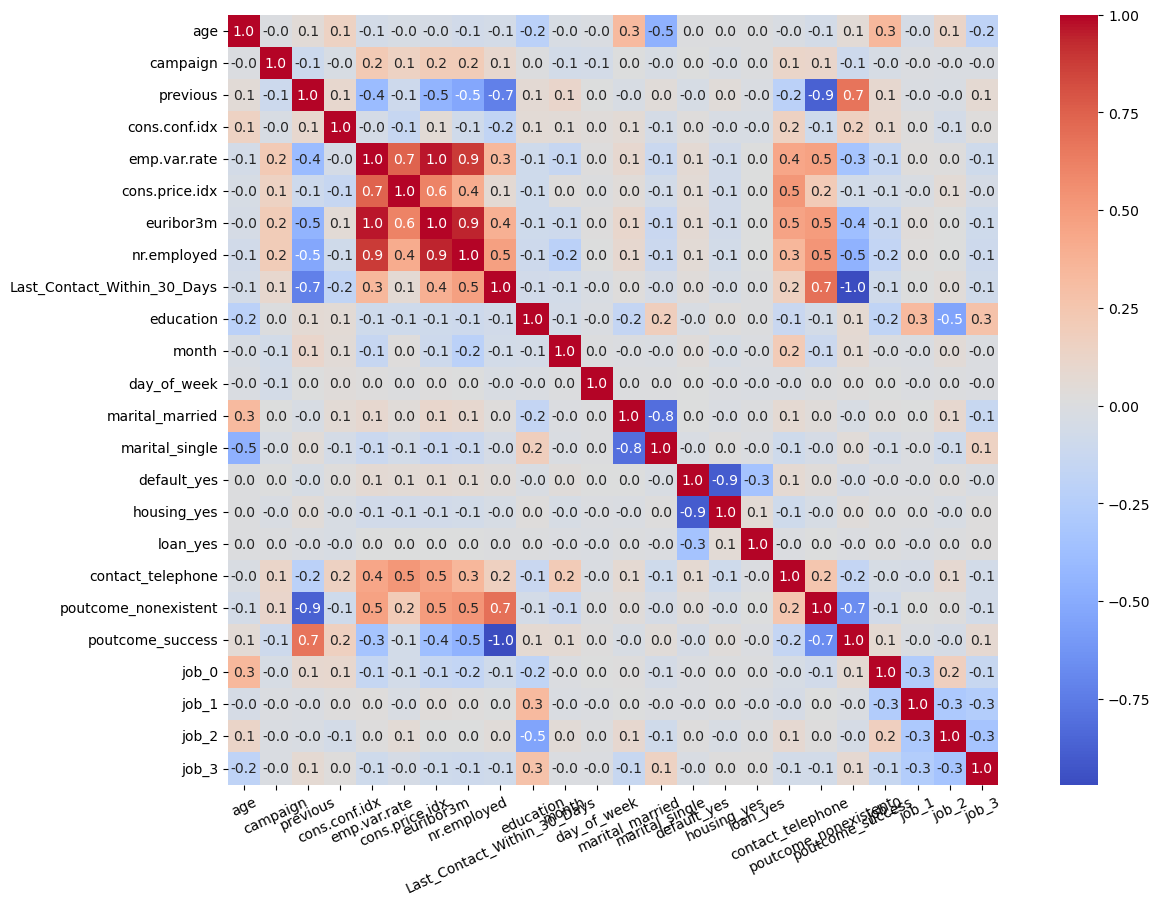

In [43]:
plt.figure(figsize=(16, 10))
sns.heatmap(X_train_smote.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, fmt=".1f", square=True)
plt.xticks(rotation=25)
plt.show()

In [44]:
X_train_VIF_score = [variance_inflation_factor(X_train_smote.values, i) for i in range(len(X_train_smote.columns))]

X_train_VIF_df = pd.DataFrame({
    "Columns": X_train_smote.columns,
    "VIF Score": X_train_VIF_score,
}).sort_values(by="VIF Score", ascending=False)

X_train_VIF_df[X_train_VIF_df["VIF Score"] > 10]

,Columns,VIF Score
7,nr.employed,30619.532614
5,cons.price.idx,27536.561098
8,Last_Contact_Within_30_Days,202.284226
6,euribor3m,200.173405
4,emp.var.rate,38.102810
18,poutcome_nonexistent,24.302839
19,poutcome_success,19.742153
15,housing_yes,17.470511
14,default_yes,14.467790


In [45]:
X_train_VIF = X_train_smote.drop(columns=['nr.employed', 'cons.price.idx', 'Last_Contact_Within_30_Days', 'euribor3m'])
X_test_VIF = X_test_prep.drop(columns=['nr.employed', 'cons.price.idx', 'Last_Contact_Within_30_Days', 'euribor3m'])

Some column have high VIF score as well with high correlation score from the figures above. Therefore, columns with extreme values will be dropped (VIF score more than 100 and correlation score more than 0.7 for multiple columns) which are: `nr.employed`, `cons.price.idx`, `Last_Contact_Within_30_Days`, and `euribor3m`. 

In [46]:
X_train_VIF_score = [variance_inflation_factor(X_train_VIF.values, i) for i in range(len(X_train_VIF.columns))]

X_train_VIF_df = pd.DataFrame({
    "Columns": X_train_VIF.columns,
    "VIF Score": X_train_VIF_score,
}).sort_values(by="VIF Score", ascending=False)

X_train_VIF_df[X_train_VIF_df["VIF Score"] > 10]

,Columns,VIF Score
14,poutcome_nonexistent,16.849894
11,housing_yes,11.121383


In [47]:
X_train_VIF = X_train_VIF.drop(columns=['poutcome_nonexistent'])
X_test_VIF = X_test_VIF.drop(columns=['poutcome_nonexistent'])

This `poutcome` column remains to have VIF score higher than 10 which is the threshold, and as seen in the previous heatmap that this column also highly correlated with another column with value of 0.9, 0.7, etc. Thus, this column will also be dropped.

In [48]:
X_train_VIF_score = [variance_inflation_factor(X_train_VIF.values, i) for i in range(len(X_train_VIF.columns))]

X_train_VIF_df = pd.DataFrame({
    "Columns": X_train_VIF.columns,
    "VIF Score": X_train_VIF_score,
}).sort_values(by="VIF Score", ascending=False)

X_train_VIF_df

,Columns,VIF Score
11,housing_yes,8.467653
10,default_yes,7.096802
5,education,6.414170
8,marital_married,6.191837
9,marital_single,4.379016
6,month,4.247858
7,day_of_week,3.112124
18,job_3,3.052364
17,job_2,2.580056
2,previous,2.366680


Iterative dropping columns with high VIF and high correlation value resulting in this table with the highest VIF score of 5.6. Indicating that there are no columns with serious multicollinearity left.

In [49]:
benchmark_vif_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_VIF, y_train_smote, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc')
    
    benchmark_vif_results[name] = {
        "mean": scores.mean(),
        "std": scores.std()
    }

In [ ]:
pd.DataFrame({
    "Models": benchmark_vif_results.keys(),
    "Mean ROC AUC Score": [benchmark_vif_results[i]['mean'] for i in benchmark_vif_results.keys()],
    "Std ROC AUC Score": [benchmark_vif_results[i]['std'] for i in benchmark_vif_results.keys()]
}).sort_values(by="Mean ROC AUC Score", ascending=False)

,Models,Mean ROC AUC Score,Std ROC AUC Score
3,Random Forest,0.979775,0.001098
4,XGBoost,0.973229,0.001990
5,K-Nearest Neighbors,0.936629,0.001702
2,Decision Tree,0.896716,0.003519
0,Logistic Regression,0.768329,0.001598
1,Support Vector Machine,0.762394,0.002554


After Removing some columns with high VIF and high correlation, it shown that the model performance has slightly decreased compared to the previous model which is data with oversampling. Though the model order remains the same by mean ROC AUC score, Random Forest as the best, followed by XGBoost, and K-Nearest Neighbors. 

#### **6.1.4. Model Benchmark to Test Data**

4 top models from each data approaches will be compared including Decision Tree, Random Forest, XGBoost, and K-Nearest Neighbors towards the test data. While the scoring metrics used are ROC AUC and F1 score to provide general insights.

In [212]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [213]:
benchmark_test_raw_data_results = {}

for name, model in models.items():
    model.fit(X_train_prep, y_train)
    
    y_pred = model.predict(X_test_prep)
    y_pred_proba = model.predict_proba(X_test_prep)[:, 1]
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    benchmark_test_raw_data_results[name] = {
        "cm": cm,
        'f1': f1,
        'roc_auc': roc_auc,
        "roc_curve": {
            "fpr": fpr,
            "tpr": tpr,
        }
    }

In [214]:
benchmark_test_smote_data_results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    
    y_pred = model.predict(X_test_prep)
    y_pred_proba = model.predict_proba(X_test_prep)[:, 1]
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    benchmark_test_smote_data_results[name] = {
        "cm": cm,
        'f1': f1,
        'roc_auc': roc_auc,
        "roc_curve": {
            "fpr": fpr,
            "tpr": tpr,
        }
    }

In [215]:
result_test_comparison_df = pd.DataFrame({
    "Models": models.keys(),
    "Raw Data F1 Score": [result[1]['f1'] for result in benchmark_test_raw_data_results.items()],
    "Oversampled Data F1 Score": [result[1]['f1'] for result in benchmark_test_smote_data_results.items()],
    "Raw Data ROC AUC Score": [result[1]['roc_auc'] for result in benchmark_test_raw_data_results.items()],
    "Oversampled Data ROC AUC Score": [result[1]['roc_auc'] for result in benchmark_test_smote_data_results.items()],
})

result_test_comparison_df

,Models,Raw Data F1 Score,Oversampled Data F1 Score,Raw Data ROC AUC Score,Oversampled Data ROC AUC Score
0,Decision Tree,0.325942,0.327273,0.625080,0.626425
1,Random Forest,0.391470,0.430241,0.757833,0.758904
2,XGBoost,0.391476,0.414634,0.781048,0.779019
3,K-Nearest Neighbors,0.335790,0.325501,0.703216,0.702649


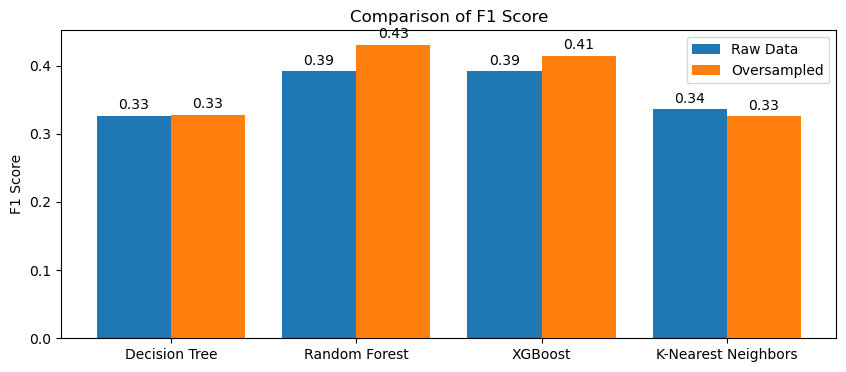

In [216]:
x = np.arange(len(models.keys())) 

plt.figure(figsize=(10,4))
plt.bar(x - 0.2, result_test_comparison_df['Raw Data F1 Score'], 0.4, label = 'Raw Data') 
plt.bar(x + 0.2, result_test_comparison_df['Oversampled Data F1 Score'], 0.4, label = 'Oversampled') 

for i, (raw, oversampled) in enumerate(zip(result_test_comparison_df['Raw Data F1 Score'], result_test_comparison_df['Oversampled Data F1 Score'])):
    plt.text(i - 0.2, raw + 0.01, f'{raw:.2f}', ha='center')
    plt.text(i + 0.2, oversampled + 0.01, f'{oversampled:.2f}', ha='center')

plt.xticks(x, models.keys())
plt.ylabel("F1 Score") 
plt.title("Comparison of F1 Score") 
plt.legend() 
plt.show() 

From the figure above showing the comparison of F1 score, it is shown that Random Forest model performs best on both raw and oversampled data. Which followed by XGBoost with the same score on raw data, and slightly lower on oversampled data. 

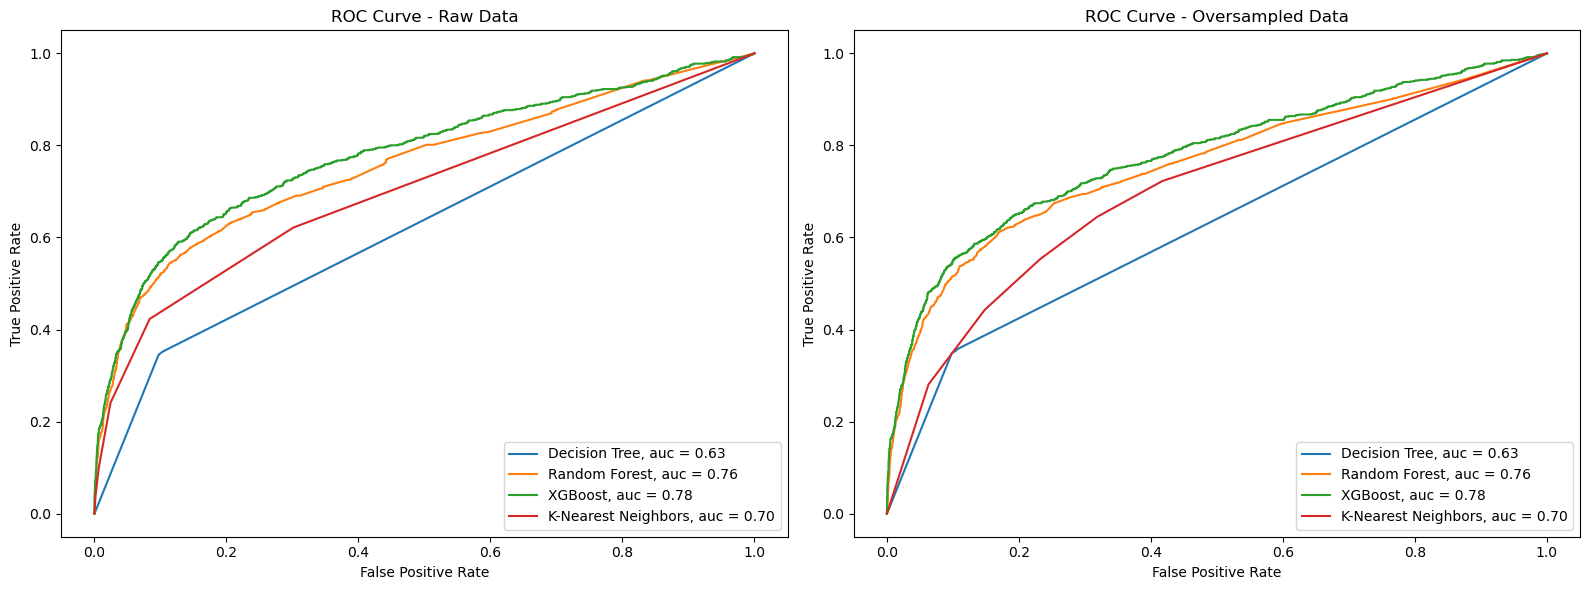

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for name, model in benchmark_test_raw_data_results.items():
    axes[0].plot(model['roc_curve']['fpr'], model['roc_curve']['tpr'], label=f"{name}, auc = {model['roc_auc']:.2f}")

axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Raw Data')
axes[0].legend(loc=4)

for name, model in benchmark_test_smote_data_results.items():
    axes[1].plot(model['roc_curve']['fpr'], model['roc_curve']['tpr'], label=f"{name}, auc = {model['roc_auc']:.2f}")

axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Oversampled Data')
axes[1].legend(loc=4)

plt.tight_layout()
plt.show()

From the figure above showing the comparison of ROC curve, it seen that XGBoost has the best performances on both raw and oversampled data. This shows that XGBoost is the most effective model on predicting the positive classes correctly. In addition, the ROC AUC score between raw and oversampled data remains the same for all models. Which mean the model was already effective to distinguish positive and negative classes, so oversampling did not significantly improve its performance. And as shown before, that the target variable with 0 value are over four thousand records, which could be enough.

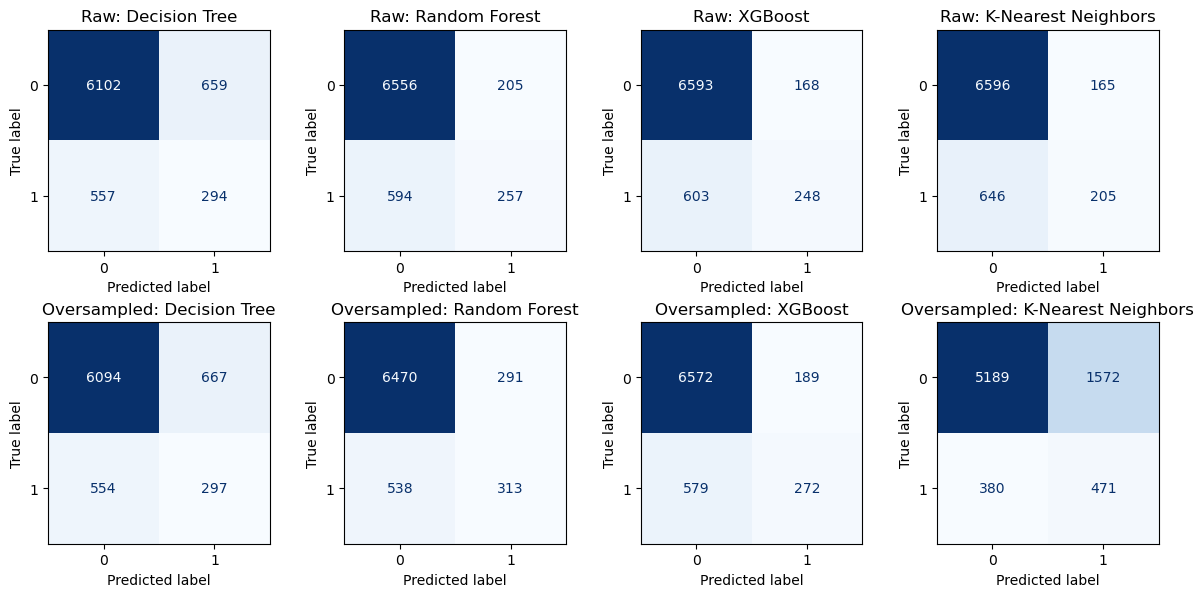

In [218]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, (name, model) in enumerate(benchmark_test_raw_data_results.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=model['cm'])
    disp.plot(cmap=plt.cm.Blues, ax=axes[0, i], colorbar=False)
    axes[0, i].set_title(f"Raw: {name}")

for i, (name, model) in enumerate(benchmark_test_smote_data_results.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=model['cm'])
    disp.plot(cmap=plt.cm.Blues, ax=axes[1, i], colorbar=False)
    axes[1, i].set_title(f"Oversampled: {name}")

plt.tight_layout()
plt.show()


Confusion matrix above provides a detailed breakdown of the predictions as below:       
- For True Negative (TN) predictions, K-Nearest Neighbors on raw data have the highest score, followed by XGBoost on raw data and XGBoost on oversampled data.      
- For True Positive (TP) predictions, K-Nearest Neighbors on oversampled data have the highest score, followed by Random Forest on oversampled data and Decision Tree on oversampled data. 
- For False Negative (FN) predictions, K-Nearest Neighbors on oversampled data have the lowest score, followed by Random Forest on oversampled data and Decistion Tree on oversampled data.
- For False Positive (FP) predictions, K-Nearest Neighbors on oversampled data have the lowest score, followed by XGBoost on raw data and XGBoost on oversamled data.

Summarization for each model comparison are provided in the table below:

| Models | F1 Score | ROC AUC | Confusion Matrix |
|--|--|--|--|
| Decision Tree | Performs worst performance on both raw and oversampled data | Also performs worst on both raw and oversampled data | High FP, FN, and TP predictions on both raw and oversampled data |       
| Random Forest | Performs best performance on both raw and oversampled data | Performs slightly worse than XGBoost | Small false predictions on raw data, while high FP predictions on oversampled data |      
| XGBoost | Performs slightly worse than random forest on oversampled data, as powerful as RF on raw data | Performs the best on both raw and oversampled data | Smallest FP predictions on both raw and oversampled data, high FN on both raw and oversampled data |       
| K-Nearest Neighbors | Slightly better than Decistion Tree on raw data, same performance as Decision Tree on oversampled data | Slightly better than Decision Tree on both raw and oversampled data | Highest FP and TP predictions on oversampled data, Smallest FN and FP predictions on raw data |      

While this model goal is to minimize FP while increasing TP as well, **XGBoost** model performs the best in the confusion matrix. Even though the TP prediction isn't as good as the other model, this model offers the lowest FP predictions on raw data. Moreover that this model performs the best in ROC AUC and only scored below under the Random Forest in F1 score. Oversampling technique improves the overall F1 score for all models, while decreasing the FN in confusion matrix and introduce better TP prediction on some models.

#### **6.1.5. Model Hyperparameter Tuning**

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
default_model = xgb.fit(X_train_smote, y_train_smote)
y_pred_default = default_model.predict(X_test_prep)
y_pred_proba_default = default_model.predict_proba(X_test_prep)

y_pred_tuned = best_model.predict(X_test_prep)
y_pred_proba_tuned = best_model.predict_proba(X_test_prep)

print("Classification Report before Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_default))

print("\nClassification Report after Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_tuned))

Classification Report before Hyperparameter Tuning:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6761
           1       0.59      0.32      0.41       851

    accuracy                           0.90      7612
   macro avg       0.75      0.65      0.68      7612
weighted avg       0.88      0.90      0.89      7612

Classification Report after Hyperparameter Tuning:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6761
           1       0.59      0.34      0.43       851

    accuracy                           0.90      7612
   macro avg       0.75      0.65      0.69      7612
weighted avg       0.88      0.90      0.89      7612



From the classification report above, seen that hyperparameter tuning increases the recall for class 1 and f1-score for class 1. This model has successfully predicted class 0 effectively shown by high score of precision 0 and recall 0.

#### **6.1.6. Underfitting Overfitting**

#### **6.1.7. Pipeline**

In [249]:
modeling_pipeline = Pipeline([
    ('tuned_xgb', best_model)
])

modeling_pipeline

Pipeline(steps=[('tuned_xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [250]:
final_pipeline = Pipeline([
    ('feature_engineering', feature_engineering_pipelines),
    ('modeling', modeling_pipeline)
])

final_pipeline

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('Data Imputer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['default'])])),
                                 ('Rename After Imputer',
                                  FunctionTransformer(func=<function rename_columns_remainder at 0x338fb04a0>)),
                                 ('Feature Selection',
                                  ColumnTransformer(remainder='passthrough...
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=0.1, max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=6, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=200, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...))]))])

### **6.2. Analysis**

#### **6.2.1. Model Benchmark Analysis**

From [modeling](#61-modeling) section, the conclusion is that XGBoost model is the most effective model for this case. With some tuned hyperparameter including: `max_depth` (default 3), and `subsample` (default 1). Although K-Nearest Neighbors model resulting in highest True Positive (TP) predictions, which returns highest revenue for the banking institute by customer opening a deposit account. It comes with a drawback of enormous number of False Positive (FP) predictions which cost the institute for wasted efforts by calling customer that won't open a deposit account. Since this data is imbalanced, oversampling method is effective to increase the number of True Positive (TP) predictions, even when the drawbacks are increasing the number of False Positive (FP). However the FP increase is inconsiderable, considering the increase of FP predictions.

#### **6.2.2. Business ML Analysis**

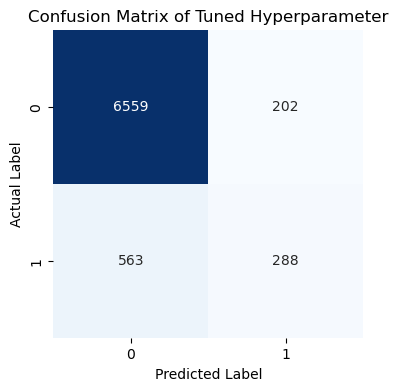

In [264]:
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Tuned Hyperparameter")
plt.show()

In [265]:
confusion_matrix(y_test, y_pred_tuned)

array([[6559,  202],
       [ 563,  288]])

From the confusion matrix above, the False Positive (FP) is 202 while the True Positive (TP) is 288. Based on this

<p style="font-weight:500">Related to Telemarketing</p>

Average mobile calls cost&emsp;&emsp;&emsp;&ensp;: €0.076 per minute [[Anacom, 2013](https://www.anacom.pt/render.jsp?contentId=1171059)]       
Effective call duration&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: 4'50" [[Klenty, 2023](https://www.klenty.com/blog/how-many-cold-calls-to-make-per-day/)]     
Number of calls to reach a sale&emsp;: 48 calls per customer [[Rep.ai, 2025](https://rep.ai/blog/cold-calling-statistics)]      
Average closing rate&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: 20% [[HubSpot, 2017](https://blog.hubspot.com/sales/new-sales-close-rate-industry-benchmarks-how-does-your-close-rate-compare#:~:text=However%2C%20the%20average%20close%20rate,become%20less%20aligned%20since%202021.)]

<p style="font-weight:500">Related to Bank Deposit</p>

Minimum amount to open a term deposit&emsp;: €200 [[e-residence, 2023](https://e-residence.com/open-bank-account/#:~:text=What%20is%20the%20minimum%20amount,€200%20and%20€300.)]        
Average bank profit from deposit&emsp;&emsp;&emsp;&emsp;&ensp;: 3% [[FDIC, 2024](https://www.fdic.gov/news/speeches/2024/quarterly-banking-profile-first-quarter-2024#:~:text=As%20seen%20in%20this%20chart,pandemic%20rate%20of%200.66%20percent.&text=The%20next%20chart%20shows%20that%20the%20noncurrent%20loan%20balances%20grew,community%20banks%20was%20209.6%20percent.&text=Next%20chart%20shows%20that%20domestic,increase%20since%20fourth%20quarter%202021.)]

From the confusion matrix above, the False Positive (FP) is 202 while the True Positive (TP) is 288. Based on this, total calculation of the benefit can be constructed as:

FP Cost : 80% * ((0,076 * 290/60 * 48) * 202) = - €59.36        
TP Revenue : (288 * 200) * 3% = + €1,728        
Loss FN Cost : (563 * 200) * 3% = - 


FP Cost : (0,076 * 290/60) 

In [266]:
y.value_counts()

y
0    33800
1     4256
Name: count, dtype: int64

## **7. Conclusion and Recommendation**

### **7.1. Conclusion**

In [ ]:
conclusion on business

conclusion


### **7.2. Recommendation**

recommendation for ML